# Predictions based on third vector - v3

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)

In [2]:
model_data = pd.read_csv('learning_vectors/v03/version03-transfermarkt.csv', sep=',')
model_data = model_data.set_index(['Match_id'])

model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                      'H_age', 'A_age',
                      'H_TMV', 'A_TMV']

print(model_data.shape)
# model_data.head()


(6080, 11)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison

In [4]:
features = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

print(model_data[features].shape)
model_data[features].head()


(6080, 4)


,H_age,A_age,H_TMV,A_TMV
Match_id,,,,
1730,21.3,24.6,250.0,64.0
1731,24.9,23.9,91.0,257.0
1732,24.3,25.7,80.0,61.0
1734,24.4,26.4,162.0,86.0
1735,22.3,22.5,73.0,212.0


### Basic compraison: 

Alg/res.mean/res.std
LR: 0.535526 (0.010780)
LDA: 0.536184 (0.013483)
KNN: 0.479276 (0.002106)
CART: 0.418914 (0.010714)
NB: 0.524836 (0.015184)
SVM: 0.452796 (0.004591)


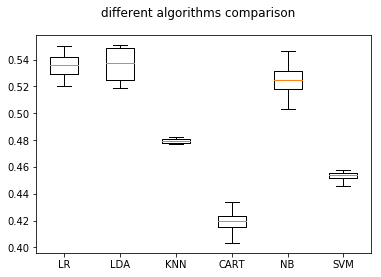

In [5]:
X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Basic comparison with preprocessing:

Alg/res.mean/res.std
LR: 0.535033 (0.004997)
LDA: 0.536513 (0.006128)
KNN: 0.491283 (0.006747)
CART: 0.421217 (0.005230)
NB: 0.524507 (0.007317)
SVM: 0.533224 (0.007847)


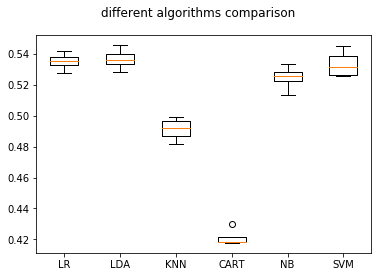

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
